In [367]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhi-air-quality-dataset/final_dataset.csv


# ABOUT PROJECT


**Project Description**

This project investigates the temporal and seasonal patterns of air pollution in DELHI, the key drivers of Air Quality Index (AQI), and the impact of human activity fluctuations on air quality. Using a dataset containing daily pollutant concentrations over multiple years, the study addresses three central research questions:

**Temporal and weekly patterns**: How have concentrations of pollutants changed over time, and are there specific days of the week associated with higher or lower pollution levels?

**Pollutant influence on AQI**: Which pollutants show the strongest correlation with AQI?

**Impact of human activity reduction**: Does reduction in human activity, such as during public holidays, significantly improve air quality?


**Methods and Analysis**

To answer these questions, the analysis involved:

**Data Cleaning and Preparation**: Columns were standardized, dates were converted to datetime objects, and new features such as Day of the Week, Month, and Quarter were engineered to capture temporal trends.

**Exploratory Data Analysis**:

**Temporal Trends**: Line plots were created for key pollutants (PM2.5, PM10, NO2, SO2, CO) over time, segmented by year and quarter, highlighting seasonal variations. Automated insights identified periods with peak pollution levels.

**Weekly Patterns**: Bar charts grouped by day of the week revealed which days tend to have higher or lower pollutant concentrations.

**Holiday Effects**: Comparisons of pollutant levels during public holidays versus non-holidays were visualized, showing the influence of reduced human activity on air quality.

**Correlation Analysis**: A heatmap and correlation tables were used to identify pollutants most strongly associated with AQI. Automated insights highlighted the dominant contributors and tracked their influence across years.

**Automated Insights**: For each visualization, the analysis included dynamic observations, such as seasonal or quarterly trends, peak pollution periods, and days with the worst air quality. These insights make the findings interpretable without manually inspecting the plots.

Key Findings

**1. Seasonal / Quarterly Trends**

PM2.5, PM10, NO2, and CO reach their highest levels in Q4 and lowest in Q3, indicating air quality worsens toward the end of the year.

SO2 peaks in Q2 and is lowest in Q1, while Ozone peaks in Q2 and drops in Q4, showing distinct seasonal behavior for gaseous pollutants.

These patterns highlight the seasonal influence on pollution levels, likely driven by climatic conditions and emission activities.

**2. Weekly Patterns**

PM2.5, NO2, and CO tend to peak on Fridays, while PM10 peaks on Tuesdays, SO2 on Mondays, and Ozone on Thursdays.

This indicates that human activity throughout the week affects pollutant concentrations, with higher emissions toward the end or beginning of the workweek for certain pollutants.

**3. Pollutant Influence on AQI**

PM10 shows the strongest correlation with AQI (r = 0.90), making it the primary driver of poor air quality.

PM2.5 also has a significant positive correlation (r = 0.85), contributing to elevated AQI.

Ozone and SO2 show weak or negligible correlations with AQI, suggesting they have less direct influence on overall air quality in this dataset.

**4. Overall Insight**

Particulate matter (PM10 and PM2.5) dominates the air quality trends, with concentrations peaking in specific quarters and on specific days of the week.

Seasonal, weekly, and human activity patterns clearly impact pollutant levels, providing opportunities for targeted air quality interventions, especially toward Q4 and on high-emission weekdays.emissions.

# LIB IMPORT AND DATA INGESTION

In [390]:
import matplotlib.pyplot as plt
import seaborn as sns



In [370]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  #To ignore every "futurewarning"

In [371]:
df = pd.read_csv("/kaggle/input/delhi-air-quality-dataset/final_dataset.csv") #reads the csv data

# BRIEF DESCRIPTION

In [372]:
df.head() #let's view the first five rows of our data

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [374]:
df.describe() #A quick summary of every numerical column in the data

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


# DATA CLEANING AND WRANGLING

In [375]:
def data_details(data):
    nulls = df.isnull().sum().sum() #gives total number of Nulls rows
    duplicates = df.duplicated().sum() #gives total number of duplicates in the data
    total_numerical = len(df.select_dtypes(include='number').columns)
    output = f'Total Nulls = {nulls}\nTotal Duplicates = {duplicates} \nTotal Number of Numerical Columns = {total_numerical}'
    return print(output)
data_details(df)

Total Nulls = 0
Total Duplicates = 0 
Total Number of Numerical Columns = 12


In [376]:
#date columns engineering
def date_eng(df):
    
    df.rename(columns={"Date":"Day"}, inplace=True) #renames the Date column to Day
    df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]]) #creates a new datetime column from the Year, Month, Day
    df.drop(["Month", "Day", "Days", "Year"], axis=1, inplace=True)
    df["Day"] = df["Date"].dt.day_name() #extracts actual day name from the datetime column
    df["Month"] =df["Date"].dt.month_name() #extracts actual month names from the datetime column
    df["Year"] = df["Date"].dt.year #extract the actual Year

    return df

In [377]:
#do not run this twice, if you do kindly go back to reimport data and rerun cells

df = date_eng(df)
df.head()

,Holidays_Count,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,Date,Day,Month,Year
0,0,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01,Friday,January,2021
1,0,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02,Saturday,January,2021
2,1,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03,Sunday,January,2021
3,0,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04,Monday,January,2021
4,0,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05,Tuesday,January,2021


In [378]:
#Replacing Holiday boolean represention with actual string, to make visualization more understandable
df["Holiday"] = df["Holidays_Count"].map({1: "Holiday", 0: "No Holiday"})
df.drop(["Holidays_Count"], axis=1, inplace = True)

In [379]:
#Let's see our data again
df.head(5)


,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,Date,Day,Month,Year,Holiday
0,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01,Friday,January,2021,No Holiday
1,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02,Saturday,January,2021,No Holiday
2,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03,Sunday,January,2021,Holiday
3,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04,Monday,January,2021,No Holiday
4,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05,Tuesday,January,2021,No Holiday


# OUTLIERS CHECK AND TREATMENT

/tmp/ipykernel_37/161868313.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


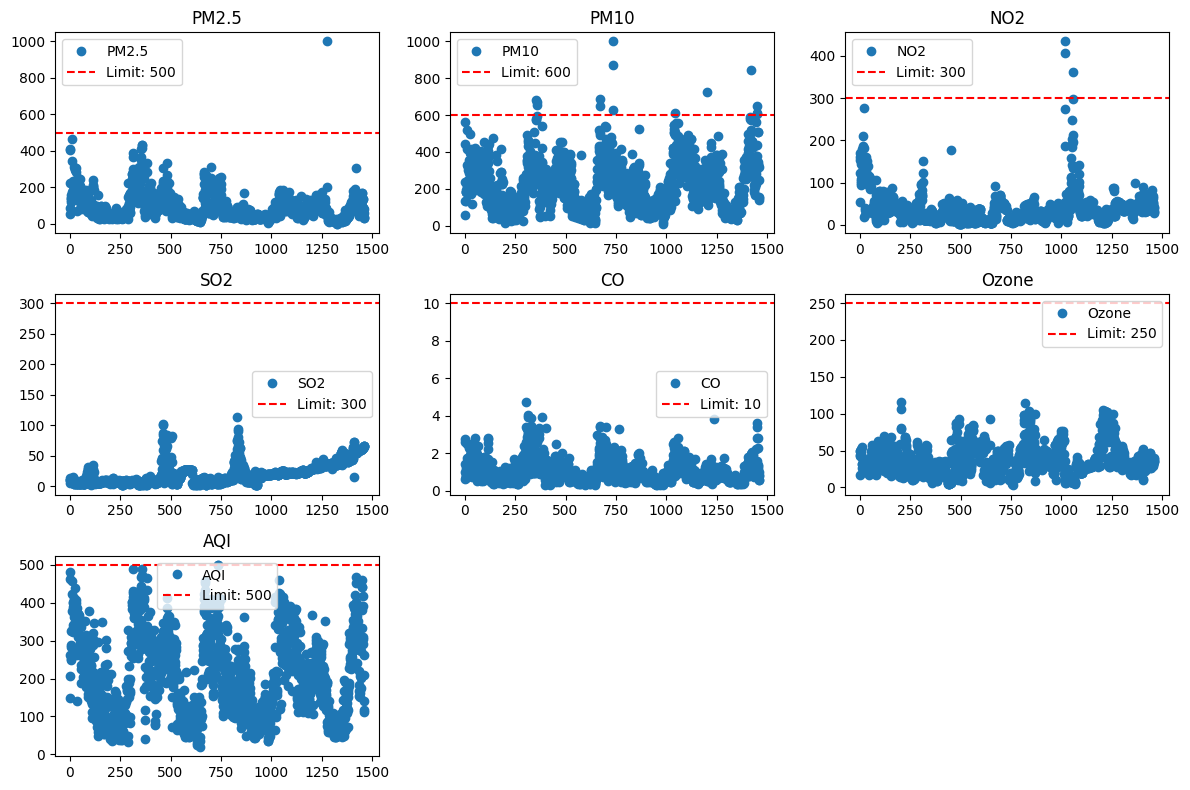

In [380]:
#test for outliers using a preset rule
#you could change the preset values to any value of your choice


filters = {"PM2.5": 500, "PM10": 600, "NO2": 300, "SO2": 300, "CO": 10, "Ozone": 250, "AQI": 500} 
"""Outlier analysis was performed using established reference thresholds based on standards from the Central
Pollution Control Board (CPCB), World Health Organization (WHO), and findings from previous Delhi air
quality studies. 
"""
numeric_cols = df.select_dtypes(include='number').columns
num_cols = numeric_cols.drop('Year')

#lets visualize all columns

plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # Adjust grid to match the number of columns
    plt.plot(df[col].values, marker='o', linestyle='', label=col)
    
    # Draw threshold if available in filters
    if col in filters:
        plt.axhline(y=filters[col], color='red', linestyle='--', label=f'Limit: {filters[col]}')

    plt.title(col)
    plt.legend()
    plt.tight_layout()

plt.show()

In [381]:
#Let's create a function that would give a count of the outliers for guilty columns

def outlier(filters, df):
    for col, val in filters.items():
        count = ((df[col] > val) | (df[col] < 0)).sum()
        if count > 0:
            print(f"{col} = {count} rows exceeded")
        else:
            print(f"There is no outlier in {col} column")
            
outlier(filters, df)


PM2.5 = 1 rows exceeded
PM10 = 14 rows exceeded
NO2 = 3 rows exceeded
There is no outlier in SO2 column
There is no outlier in CO column
There is no outlier in Ozone column
There is no outlier in AQI column


In [382]:
#treating outliers by replacing them with the median value of their repective month
for col, val in filters.items():
    # Compute the monthly median for that column
    monthly_median = df.groupby("Month")[col].transform("median")

    # Create a mask for outliers
    mask = (df[col] > val) | (df[col] < 0)

    # Replace outliers with the median of that month
    df.loc[mask, col] = monthly_median[mask]

print("All Outliers Corrected")


All Outliers Corrected


In [384]:
#Let's check again

outlier(filters, df)

There is no outlier in PM2.5 column
There is no outlier in PM10 column
There is no outlier in NO2 column
There is no outlier in SO2 column
There is no outlier in CO column
There is no outlier in Ozone column
There is no outlier in AQI column


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   PM2.5    1461 non-null   float64       
 1   PM10     1461 non-null   float64       
 2   NO2      1461 non-null   float64       
 3   SO2      1461 non-null   float64       
 4   CO       1461 non-null   float64       
 5   Ozone    1461 non-null   float64       
 6   AQI      1461 non-null   int64         
 7   Date     1461 non-null   datetime64[ns]
 8   Day      1461 non-null   object        
 9   Month    1461 non-null   object        
 10  Quarter  1461 non-null   object        
 11  Year     1461 non-null   int32         
 12  Holiday  1461 non-null   object        
dtypes: datetime64[ns](1), float64(6), int32(1), int64(1), object(4)
memory usage: 142.8+ KB


# EDA & VISUALIZATIONS (Insights)

**1. Numerical Overview**

In [385]:
df.head()

,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,Date,Day,Month,Year,Holiday
0,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01,Friday,January,2021,No Holiday
1,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02,Saturday,January,2021,No Holiday
2,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03,Sunday,January,2021,Holiday
3,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04,Monday,January,2021,No Holiday
4,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05,Tuesday,January,2021,No Holiday


In [387]:
df.drop(["Date", "Year"], axis=1).describe()

,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,90.133159,214.538597,36.445455,20.104921,1.025832,36.338871,202.210815
std,67.584744,120.053423,31.096284,16.543659,0.608305,18.951204,107.801076
min,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,72.050000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,118.420000,296.640000,44.950000,26.620000,1.240000,45.730000,284.000000
max,462.620000,595.440000,297.470000,113.400000,4.700000,115.870000,500.000000


In [388]:
#Let's engineer a column named "Quarter" so we can be able to properly have a time series analysis that consider seasons
df["Quarter"] = df["Month"].map({
    "January": "Q1", "February": "Q1", "March": "Q1",
    "April": "Q2", "May": "Q2", "June": "Q2",
    "July": "Q3", "August": "Q3", "September": "Q3",
    "October": "Q4", "November": "Q4", "December": "Q4"
})


In [389]:
df.head()


,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,Date,Day,Month,Year,Holiday,Quarter
0,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01,Friday,January,2021,No Holiday,Q1
1,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02,Saturday,January,2021,No Holiday,Q1
2,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03,Sunday,January,2021,Holiday,Q1
3,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04,Monday,January,2021,No Holiday,Q1
4,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05,Tuesday,January,2021,No Holiday,Q1


**Time Series Analysis for Each Pollutant**

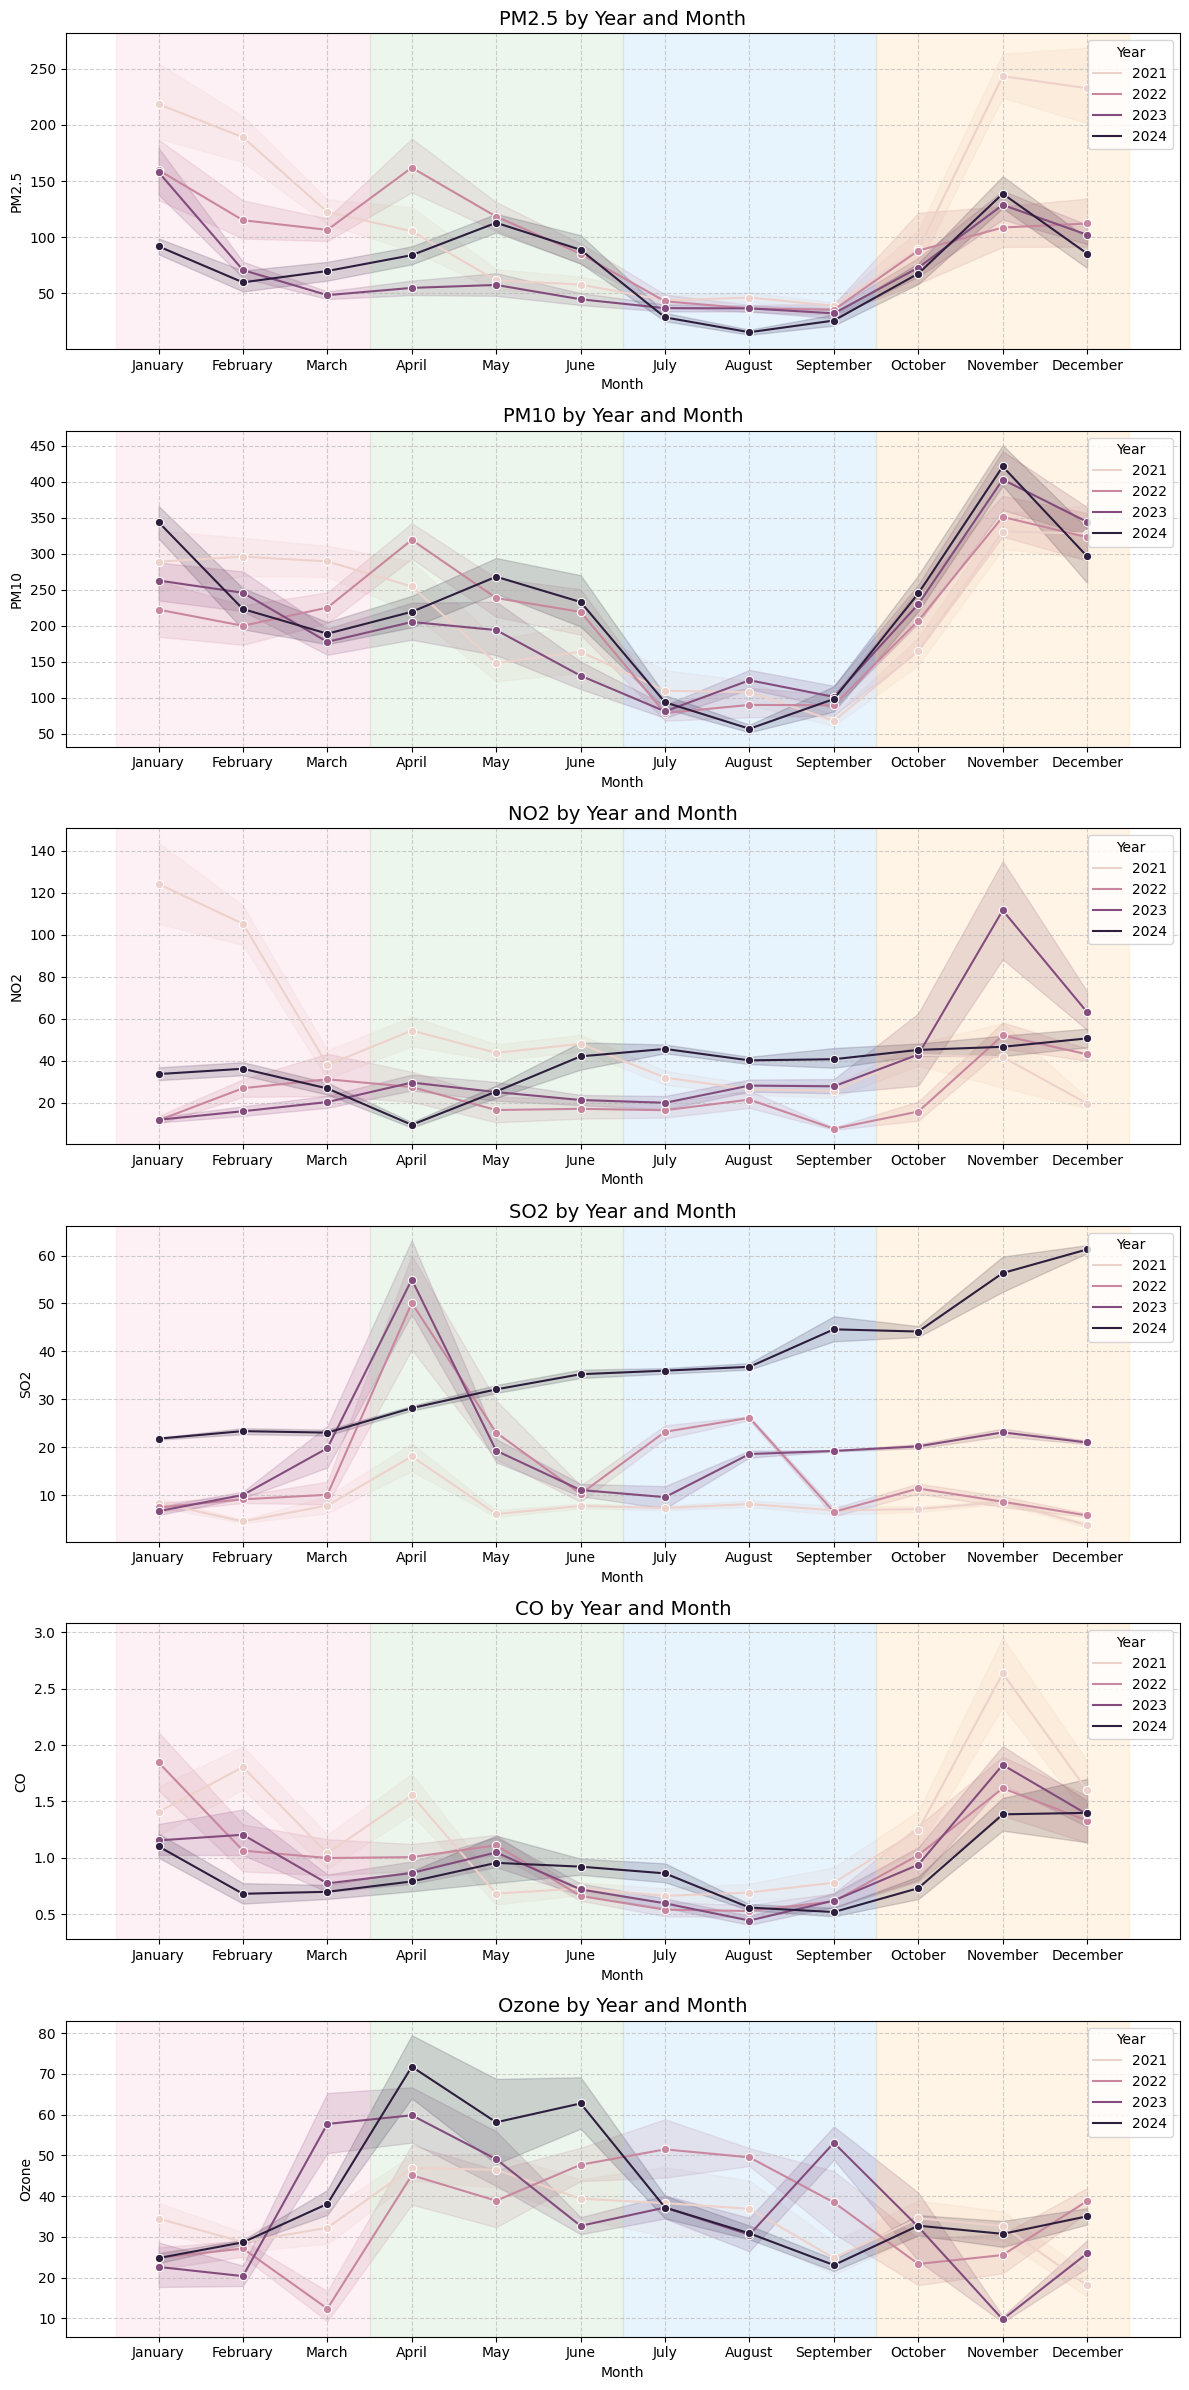

📊Seasonal/Quarterly Insights:

- PM2.5: highest in Q4, lowest in Q3 (seasonal/quarterly trend)
- PM10: highest in Q4, lowest in Q3 (seasonal/quarterly trend)
- NO2: highest in Q4, lowest in Q3 (seasonal/quarterly trend)
- SO2: highest in Q2, lowest in Q1 (seasonal/quarterly trend)
- CO: highest in Q4, lowest in Q3 (seasonal/quarterly trend)
- Ozone: highest in Q2, lowest in Q4 (seasonal/quarterly trend)


In [398]:

#pollutants list
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone"]

# Number of subplots
n = len(pollutants)
fig, axes = plt.subplots(n, 1, figsize=(12, 4 * n), sharex=False)

# Define quarter colors
quarter_colors = {
    "Q1": "#F8BBD0",  # light pink
    "Q2": "#A5D6A7",  # soft green
    "Q3": "#90CAF9",  # light blue
    "Q4": "#FFCC80"   # warm orange
}

# Prepare seasonal/quarterly insights
insights = []

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    
    # Plot line by month and hue=Year
    sns.lineplot(
        data=df,
        x="Month",
        y=pollutant,
        hue="Year",
        marker="o",
        ax=ax
    )

    # Shade background by quarter
    months_order = df["Month"].unique()
    for q in df["Quarter"].unique():
        q_months = df[df["Quarter"] == q]["Month"].unique()
        if len(q_months) > 0:
            x_start = np.where(months_order == q_months[0])[0][0] - 0.5
            x_end = np.where(months_order == q_months[-1])[0][0] + 0.5
            ax.axvspan(x_start, x_end, color=quarter_colors[q], alpha=0.2)
    
    # Titles, grid, legend
    ax.set_title(f"{pollutant} by Year and Month", fontsize=14)
    ax.set_ylabel(pollutant)
    ax.set_xlabel("Month")
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.legend(title="Year", loc="upper right")
    
    # --- Compute quarterly trend ---
    quarterly_avg = df.groupby("Quarter")[pollutant].mean()
    max_q = quarterly_avg.idxmax()
    min_q = quarterly_avg.idxmin()
    trend = f"{pollutant}: highest in {max_q}, lowest in {min_q} (seasonal/quarterly trend)"
    insights.append(trend)

plt.tight_layout()
plt.show()

# Print automated seasonal/quarterly insights
print("📊Seasonal/Quarterly Insights:\n")
for insight in insights:
    print("- " + insight)


**Pollutants by Days of the Week**

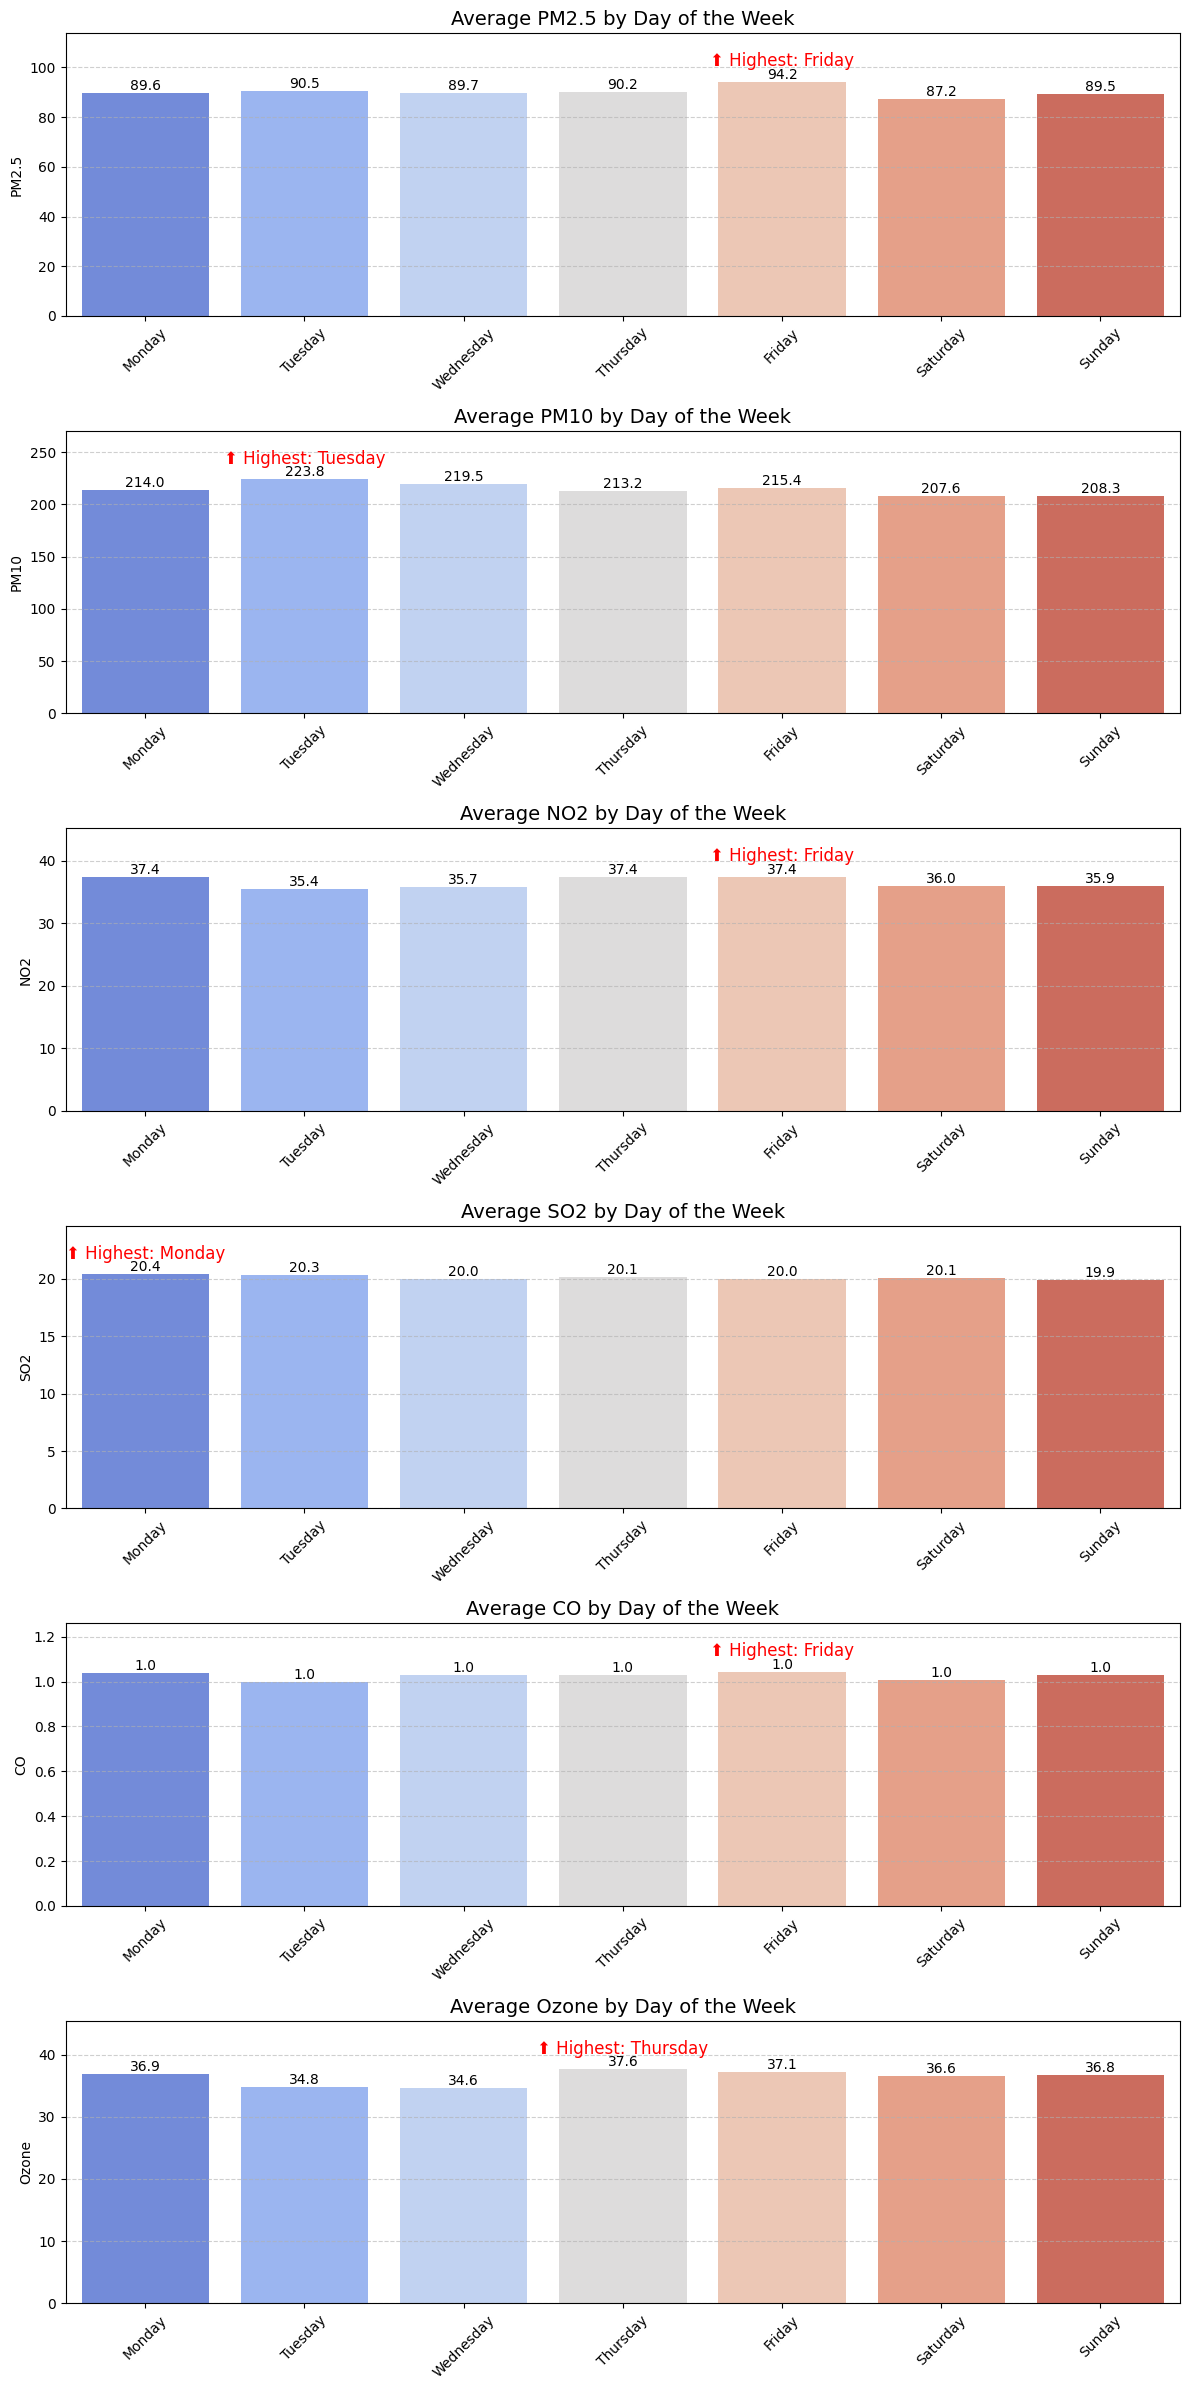

Insights by Day:

PM2.5 peaks on Fridays with an average of 94.2.
PM10 peaks on Tuesdays with an average of 223.8.
NO2 peaks on Fridays with an average of 37.4.
SO2 peaks on Mondays with an average of 20.4.
CO peaks on Fridays with an average of 1.0.
Ozone peaks on Thursdays with an average of 37.6.


In [397]:


# List of pollutant columns
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone"]  # adjust based on your df

# Group by day_name and compute average (or median if you prefer)
daily_avg = df.groupby("Day")[pollutants].mean().reset_index()

# Ensure days are ordered properly
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_avg["Day"] = pd.Categorical(daily_avg["Day"], categories=day_order, ordered=True)
daily_avg = daily_avg.sort_values("Day")

# Create subplots
n = len(pollutants)
fig, axes = plt.subplots(n, 1, figsize=(12, 4 * n))

# Prepare automated insight text
insights = []

# Plot each pollutant as a bar chart
for i, pollutant in enumerate(pollutants):
    sns.barplot(
        data=daily_avg,
        x="Day",
        y=pollutant,
        palette="coolwarm",
        ax=axes[i]
    )
    axes[i].set_title(f"Average {pollutant} by Day of the Week", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(pollutant)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].tick_params(axis='x', rotation=45)

    # Get limits and add some space at the top
    y_min, y_max = axes[i].get_ylim()
    axes[i].set_ylim(y_min, y_max * 1.15)

    # Highlight highest bar
    max_val = daily_avg[pollutant].max()
    max_day = daily_avg.loc[daily_avg[pollutant].idxmax(), "Day"]
    axes[i].bar_label(axes[i].containers[0], fmt="%.1f", label_type='edge')
    axes[i].text(
        daily_avg["Day"].tolist().index(max_day),
        max_val * 1.05,
        f"⬆ Highest: {max_day}",
        ha='center', va='bottom', color='red', fontsize=12
    )


  # Append automated insight for this pollutant
    insights.append(f"{pollutant} peaks on {max_day}s with an average of {max_val:.1f}.")

plt.tight_layout()
plt.show()

# Print automated insights
print("Insights by Day:\n")
for insight in insights:
    print(insight)


In [336]:
df.head()

,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,Date,Day,Month,Year,Holiday,Quarter
0,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01,Friday,January,2021,No Holiday,Q1
1,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02,Saturday,January,2021,No Holiday,Q1
2,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03,Sunday,January,2021,Holiday,Q1
3,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04,Monday,January,2021,No Holiday,Q1
4,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05,Tuesday,January,2021,No Holiday,Q1


**Comparison of Pollutants (By Holiday)**

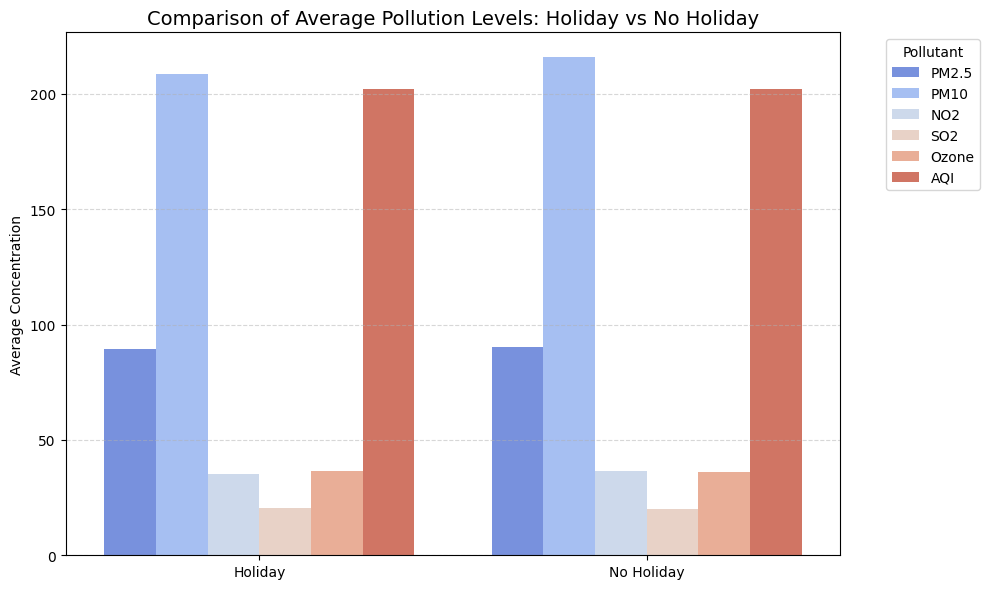

In [347]:

# Pollutant columns
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "Ozone", "AQI"]

# Compute average values for holiday and non-holiday
holiday_avg = df.groupby("Holiday")[pollutants].mean().reset_index()

# Melt data to long format for plotting
melted = holiday_avg.melt(id_vars="Holiday", var_name="Pollutant", value_name="Concentration")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=melted,
    x="Holiday",
    y="Concentration",
    hue="Pollutant",
    palette="coolwarm"
)

# Customize
plt.title("Comparison of Average Pollution Levels: Holiday vs No Holiday", fontsize=14)
plt.xlabel("")
plt.ylabel("Average Concentration")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Pollutant", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# CORRELATIONS

**Correlation between Pollutants**

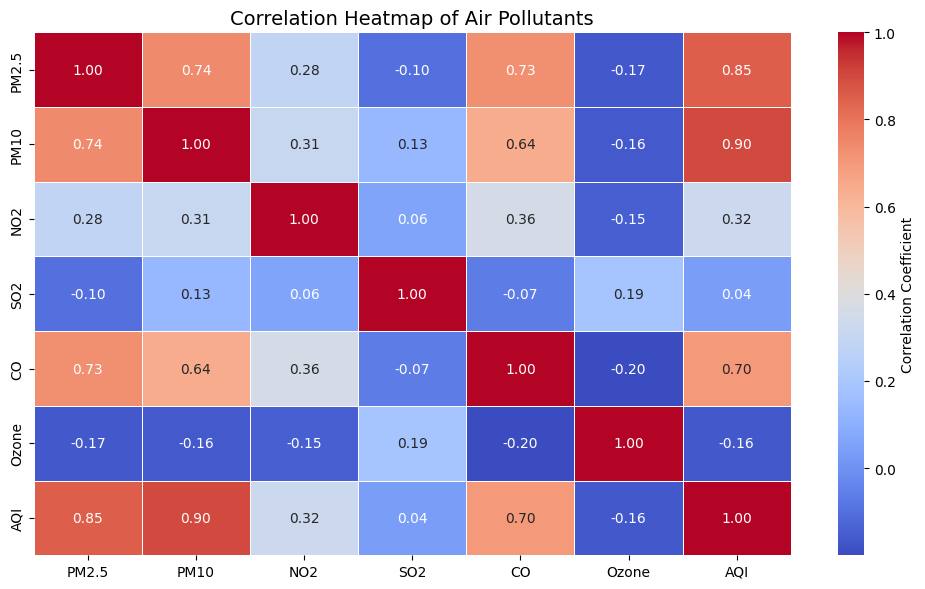


📊 **Automated Insights on Correlation Analysis**

1️⃣ Strongest correlation: **AQI** and **PM10**
   (r = 0.90)

2️⃣ Weakest correlation: **AQI** and **SO2**
   (r = 0.04)

3️⃣ The pollutant most strongly associated with AQI is **PM10** (r = 0.90), indicating it plays a major role in air quality.



In [402]:


# --- Plot Heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"label": "Correlation Coefficient"}
)
plt.title("Correlation Heatmap of Air Pollutants", fontsize=14)
plt.tight_layout()
plt.show()



# Flatten the correlation matrix
corr_pairs = corr.unstack().reset_index()
corr_pairs = corr_pairs.rename(columns={"level_0": "Variable 1", "level_1": "Variable 2", 0: "Correlation"})

# Remove self-correlations and duplicates
corr_pairs = corr_pairs[corr_pairs["Variable 1"] < corr_pairs["Variable 2"]]

# Drop NaNs if any
corr_pairs = corr_pairs.dropna(subset=["Correlation"])

# Default message if not enough data
if corr_pairs.empty:
    insight = "Not enough numeric variables to compute correlations between different variables."
else:
    # Strongest correlation
    strongest = corr_pairs.loc[corr_pairs["Correlation"].abs().idxmax()]
    # Weakest correlation
    weakest = corr_pairs.loc[corr_pairs["Correlation"].abs().idxmin()]
    
    # Build final insight text
    insight = f"""
📊 **Automated Insights on Correlation Analysis**

1️⃣ Strongest correlation: **{strongest['Variable 1']}** and **{strongest['Variable 2']}**
   (r = {strongest['Correlation']:.2f})

2️⃣ Weakest correlation: **{weakest['Variable 1']}** and **{weakest['Variable 2']}**
   (r = {weakest['Correlation']:.2f})

3️⃣ {insight_aqi}
"""

print(insight)



**Correlation of Pollutants with AQI**

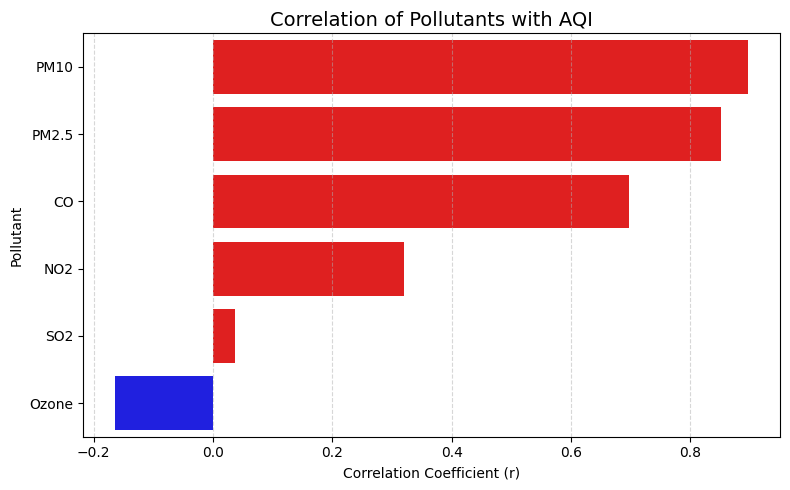


📊 **Insight:**
The analysis shows that **PM10** (r = 0.90) has the strongest positive correlation with AQI, 
indicating it is the **primary driver of poor air quality** in the dataset.
PM2.5 (r = 0.85) also exhibits a notable relationship, 
suggesting its levels often rise alongside overall AQI.

Meanwhile, Ozone show weak or negative correlations, 
implying these pollutants may behave differently or have **less direct influence** on air quality.



In [353]:

# Define pollutant columns
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone", "AQI"]

# Compute correlation with AQI
corr = df[pollutants].corr()
aqi_corr = corr["AQI"].drop("AQI").sort_values(ascending=False)

# --- Visualization ---
plt.figure(figsize=(8, 5))
sns.barplot(
    x=aqi_corr.values,
    y=aqi_corr.index,
    palette=["red" if x > 0 else "blue" for x in aqi_corr.values]
)
plt.title("Correlation of Pollutants with AQI", fontsize=14)
plt.xlabel("Correlation Coefficient (r)")
plt.ylabel("Pollutant")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Automated Insight Generator ---
top_positive = aqi_corr[aqi_corr > 0].head(2)
top_negative = aqi_corr[aqi_corr < 0].head(2)

insight = f"""
📊 **Insight:**
The analysis shows that **{top_positive.index[0]}** (r = {top_positive.iloc[0]:.2f}) has the strongest positive correlation with AQI, 
indicating it is the **primary driver of poor air quality** in the dataset.
{top_positive.index[1]} (r = {top_positive.iloc[1]:.2f}) also exhibits a notable relationship, 
suggesting its levels often rise alongside overall AQI.

Meanwhile, {', '.join(top_negative.index)} show weak or negative correlations, 
implying these pollutants may behave differently or have **less direct influence** on air quality.
"""

print(insight)
